<h2>List of Examples</h2>

<h4>Discrete Gaussian $1$D</h4>

In [1]:
home=homedir();push!(LOAD_PATH,pwd());
using sfw,blasso,toolbox,PyPlot

In [2]:
# Model constants
sigmax=.05;K=50;
# Bounds of domain
bounds=[-1.0,1.0];
# Option solver
options=sfw.sfw_options();
# Load kernel attributes
kernel=blasso.setKernel(K,sigmax,bounds);
println(typeof(kernel))

blasso.gaussian


In [3]:
# Initial measure
a0=[0.8,0.8,0.8,0.8];
x0=[-.5,-.1,.1,.5];
# Noise
srand(1);
w0=randn(K);
sigma=.01;
# Load operator Phi
op=blasso.setoperator(kernel,a0,x0,sigma*w0);

In [4]:
lambda=.5;
# Load objective function
fobj=blasso.setfobj(op,lambda);

In [5]:
@time result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem

---------------------------------------
Iteration no 1 :
New Position : [-0.0956974]
### Before BFGS ###
Amp/Pos : [0.813016,-0.0956974]
Energy : 132.870264392929
### After BFGS ###
Amp/Pos : [0.813016,-0.0956971]
Energy : 132.87026439219642
---------------------------------------
Iteration no 2 :
New Position : [0.100547]
### Before BFGS ###
Amp/Pos : [0.796161,0.793014,-0.0956971,0.100547]
Energy : 89.4265263126869
### After BFGS ###
Amp/Pos : [0.797107,0.795652,-0.0999388,0.0998945]
Energy : 89.27117525491944
---------------------------------------
Iteration no 3 :
New Position : [-0.500072]
### Before BFGS ###
Amp/Pos : [0.797107,0.795652,0.796872,-0.0999388,0.0998945,-0.500072]
Energy : 45.38397111327471
### After BFGS ###
Amp/Pos : [0.797107,0.795652,0.796872,-0.0999387,0.0998945,-0.500072]
Energy : 45.38397111254895
---------------------------------------
Iteration no 4 :
New Position : [0.499858]
### Before BFGS ###
Amp/Pos : [0.797107,0.795652,0.796872,0.795949,-0.0999387,0.09

In [6]:
sfw.show_result(result, options)

###############################################
####### Solution of BLASSO in 4/20 iter! #######
###############################################
 - u         : [0.797107,0.795652,0.796872,0.795949,-0.0999387,0.0998944,-0.500072,0.499858]
 - fobj      : 1.5983198364157298
 - g         : [6.02511e-9,2.24011e-9,-1.05673e-10,-1.46826e-7,-3.67837e-10,1.39294e-8,-1.89995e-9,1.01707e-7]
 - max(etaL) : [225.761,220.132,221.297,221.042,1.0]
 - f_converged : (tol 1.0e-15) : Bool[true,true,true,true]
 - u_converged : (tol 1.0e-14) : Bool[false,true,false,false]
 - g_converged :  (tol 1.0e-11) : Bool[false,false,false,false]
 - max lu iter hits : (max 10000) : Bool[false,false,false,false]
 - Nb iter local update          : [3,10,8,9]
 - Warning newPos : [0,0,0,0,0]
 - Warning step   : [0,0,0,0]


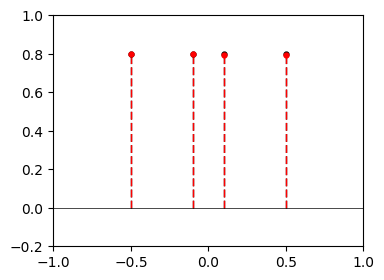

In [7]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

<h4>Dirichlet $1$D</h4>

In [9]:
# Model constants
fc=15;K=2fc+1;
# Option solver
options=sfw.sfw_options(show_mainIter=false,show_newPos=false);
# Load kernel attributes
kernel=blasso.setKernel(fc);
println(typeof(kernel))

blasso.dirichlet


In [41]:
# Initial measure
a0=[1.0,1.0,.1,.7,.8,.5,.5,.59,1.1,.3];
x0=[.2,.3,.35,.5,.7,.1,.13,.62,.77,.9];
# Noise
srand(1);
w0=randn(K);
sigma=.01;
# Load operator Phi
op=blasso.setoperator(kernel,a0,x0,sigma*w0);

In [42]:
lambda=0.3;
# Load objective function
fobj=blasso.setfobj(op,lambda);

In [43]:
@time result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem


SUCCEED! In 10 iterations.
  0.181974 seconds (396.73 k allocations: 74.870 MB, 5.53% gc time)


In [44]:
sfw.show_result(result,options);

###############################################
####### Solution of BLASSO in 10/20 iter! #######
###############################################
 - u         : [1.08992,0.989483,0.98791,0.790014,0.49705,0.691617,0.581508,0.293391,0.473255,0.0937313,0.770027,0.200163,0.299922,0.699925,0.100813,0.499993,0.620098,0.900246,0.130195,0.349827]
 - fobj      : 1.9634148634025568
 - g         : [9.67344e-9,2.16747e-8,-8.38918e-9,2.22078e-8,-2.00031e-7,1.99256e-8,8.83481e-9,2.62528e-11,2.17466e-7,-2.24076e-9,-7.03057e-10,6.3762e-8,-3.75993e-8,5.65549e-8,-1.28295e-7,-1.37174e-7,-2.39009e-7,4.67364e-7,-3.0522e-7,-2.29974e-7]
 - max(etaL) : [127.982,100.982,100.444,91.0599,70.8677,67.189,59.8251,27.7805,18.4048,9.85134,1.0]
 - f_converged : (tol 1.0e-15) : Bool[true,true,true,false,false,true,true,true,true,true]
 - u_converged : (tol 1.0e-14) : Bool[false,true,true,true,true,true,true,true,false,false]
 - g_converged :  (tol 1.0e-11) : Bool[false,false,false,false,false,false,false,false,false,fa

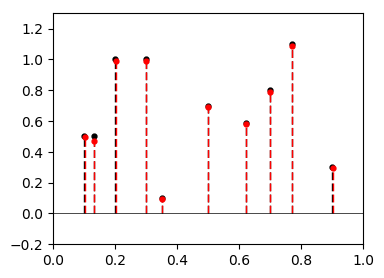

In [45]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

In [46]:
etaV=certificate.computeEtaV(x0,sign(a0),op);
etaL,d1etaL,d2etaL=certificate.computeEtaL(result.u,op,lambda);

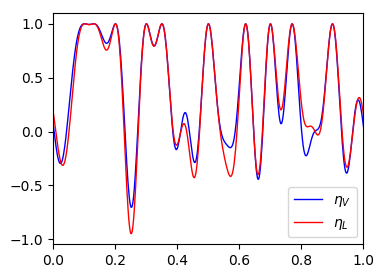

In [47]:
figure(figsize=(4,3))
tt=collect(linspace(0.0,1.0,500));
plot(tt,map(etaV,tt),color="b",lw=1.0,label=L"$\eta_V$")
plot(tt,[etaL([tt[i]]) for i in 1:length(tt)],color="r",lw=1.0,label=L"$\eta_L$")
ax=gca();
ax[:set_xlim]([0.0,1.0]);
legend()
show()

<h4>Discritized normalized Laplace $1$D</h4>

In [63]:
bounds=zeros(2);bounds[1],bounds[2]=1e-4,.8;
K=5;
s=[0.0,.3,.8,10.0,25.0]; # discretization of s->e^{-sx}

a0=[1.0,1.0];
x0=[0.15,0.62];
u0=vcat(a0,x0);

kernel=blasso.setKernel(true,bounds,pz); # Load kernel attributes
println(typeof(kernel))

options=sfw.sfw_options();

srand(1);
w0=randn(length(pz));
sigma=0.001;
op=blasso.setoperator(kernel,a0,x0,sigma*w0); # Load operator Phi

blasso.dnlaplace


In [64]:
lambda=.1;
fobj=blasso.setfobj(op,lambda); # Load objective function
result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem

---------------------------------------
Iteration no 1 :
New Position : [0.251632]
### Before BFGS ###
Amp/Pos : [2.97627,0.251632]
Energy : 0.31110787976788606
### After BFGS ###
Amp/Pos : [2.97627,0.251632]
Energy : 0.31110787976788606
---------------------------------------
Iteration no 2 :
New Position : [0.8]
### Before BFGS ###
Amp/Pos : [2.5433,0.439418,0.251632,0.8]
Energy : 0.30829387252934093
### After BFGS ###
Amp/Pos : [1.74367,1.24772,0.162529,0.634674]
Energy : 0.30426502192319616

SUCCEED! In 2 iterations.


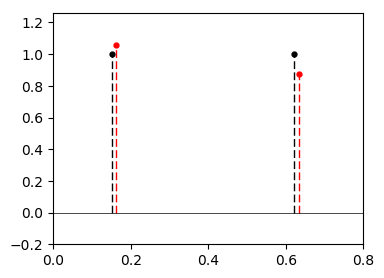

In [65]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

In [66]:
etaV=certificate.computeEtaV(x0,sign(a0),op);
etaL,d1etaL,d2etaL=certificate.computeEtaL(result.u_mainIter[end],op,lambda);

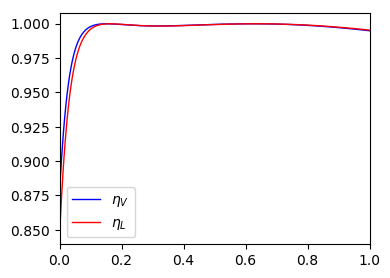

In [67]:
figure(figsize=(4,3))
tt=collect(linspace(0.0,1.0,500));
plot(tt,map(etaV,tt),color="b",lw=1.0,label=L"$\eta_V$")
plot(tt,[etaL([tt[i]]) for i in 1:length(tt)],color="r",lw=1.0,label=L"$\eta_L$")
ax=gca();
ax[:set_xlim]([0.0,1.0]);
legend()
show()